In [1]:
!pip install scikit-plot

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
import joblib
data=joblib.load("used_car_details.xlsx")

In [4]:
data

,Model,Location,Year,Driven,Variant,Price,Owner,EMI,Function
0,"Skoda Rapid 2011-2013 1.6 MPI Elegance, 2015, ...","HEBBAL, BENGALURU",2015,"30,000 km",Petrol,"₹ 5,95,000",NaN,NaN,NaN
1,"MG Hector Sharp AT, 2019, Petrol","ERNAKULAM, KOCHI",2019,"12,000 km",Petrol,"₹ 17,60,000",NaN,NaN,NaN
2,"BMW 5 Series 530d Highline Sedan, 2010, Diesel","MAHADEV VIHAR, DEHRADUN",2010,"69,000 km",Diesel,"₹ 7,51,000",NaN,NaN,NaN
3,Mahindra Bolero 2009 slx,"VADAVALLI, COIMBATORE",2009,"204,700 km",Mahindra Bolero 2009 slx,"₹ 5,50,000",NaN,NaN,NaN
4,Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,"VAISHALI, GHAZIABAD",2007,"93,000 km",Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,"₹ 1,15,000",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1579,Hyundai Grand i10 Asta AT 2015,Mumbai,2015,"34,028Km",Petrol,"4,60,000",Second Owner,NaN,Automatic
1580,Hyundai Grand i10 1.2 Sportz (O) AT 2014,Mumbai,2014,"47,000Km",Petrol,"4,48,050",First Owner,NaN,Automatic
1581,Hyundai Grand i10 Magna CRDi 2014,Lucknow,2014,"60,000Km",Petrol,"4,65,000",First Owner,NaN,Manual
1582,Hyundai Grand i10 Magna 1.2 Kappa VTVT 2014,Guwahati,2014,"44,000Km",Petrol,"3,72,000",First Owner,NaN,Manual


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 1583
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Model     5002 non-null   object
 1   Location  2331 non-null   object
 2   Year      5002 non-null   object
 3   Driven    5002 non-null   object
 4   Variant   5002 non-null   object
 5   Price     5002 non-null   object
 6   Owner     4255 non-null   object
 7   EMI       2671 non-null   object
 8   Function  4255 non-null   object
dtypes: object(9)
memory usage: 390.8+ KB


## All are of "Object " datatypes

In [6]:
data.describe()

,Model,Location,Year,Driven,Variant,Price,Owner,EMI,Function
count,5002,2331,5002,5002,5002,5002,4255,2671,4255
unique,2153,430,48,3396,208,3150,9,2109,621
top,2015 Maruti Swift,Delhi,2015,"19,857Km",Petrol,"5,00,000",1st Owner,"₹5,005",Manual
freq,62,618,383,89,3202,38,2125,8,1244


In [7]:
data.isna().sum()

Model          0
Location    2671
Year           0
Driven         0
Variant        0
Price          0
Owner        747
EMI         2331
Function     747
dtype: int64

# There are missing value in the column EMI,Location,owner and the function

In [8]:
# Finding The Unique Value of the Train_data
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

Model
2015 Maruti Swift                           62
2012 Maruti Swift                           49
2013 Maruti Swift                           47
2012 Maruti Swift Dzire                     43
2014 Maruti Swift                           42
                                            ..
BMW X5 xDrive30d M Sport 2017                1
Raghu bhai                                   1
Tata Safari Storme EX 2013                   1
Hyundai Elite i20 Asta 1.4 CRDI Opt 2015     1
Chevrolet Beat LS Petrol 2010                1
Name: Model, Length: 2153, dtype: int64

Location
Delhi                         618
Bangalore                     205
Kolkata                       100
Lucknow                        92
Mumbai                         91
                             ... 
BHANDE CHOWK, NAGPUR            1
CHAKARADHAR NAGAR, RAIGARH      1
NANDA PURI, JAIPUR              1
CHERKALA, KASARAGOD             1
KANCHIPURAM, SRIPERUMBUDUR      1
Name: Location, Length: 430, dtype: int64

Year
2015 

# lets Impute the missing "Nan" value

In [9]:
data.fillna(0)

,Model,Location,Year,Driven,Variant,Price,Owner,EMI,Function
0,"Skoda Rapid 2011-2013 1.6 MPI Elegance, 2015, ...","HEBBAL, BENGALURU",2015,"30,000 km",Petrol,"₹ 5,95,000",0,0,0
1,"MG Hector Sharp AT, 2019, Petrol","ERNAKULAM, KOCHI",2019,"12,000 km",Petrol,"₹ 17,60,000",0,0,0
2,"BMW 5 Series 530d Highline Sedan, 2010, Diesel","MAHADEV VIHAR, DEHRADUN",2010,"69,000 km",Diesel,"₹ 7,51,000",0,0,0
3,Mahindra Bolero 2009 slx,"VADAVALLI, COIMBATORE",2009,"204,700 km",Mahindra Bolero 2009 slx,"₹ 5,50,000",0,0,0
4,Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,"VAISHALI, GHAZIABAD",2007,"93,000 km",Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,"₹ 1,15,000",0,0,0
...,...,...,...,...,...,...,...,...,...
1579,Hyundai Grand i10 Asta AT 2015,Mumbai,2015,"34,028Km",Petrol,"4,60,000",Second Owner,0,Automatic
1580,Hyundai Grand i10 1.2 Sportz (O) AT 2014,Mumbai,2014,"47,000Km",Petrol,"4,48,050",First Owner,0,Automatic
1581,Hyundai Grand i10 Magna CRDi 2014,Lucknow,2014,"60,000Km",Petrol,"4,65,000",First Owner,0,Manual
1582,Hyundai Grand i10 Magna 1.2 Kappa VTVT 2014,Guwahati,2014,"44,000Km",Petrol,"3,72,000",First Owner,0,Manual


## Lets do some cleaning work:

In [10]:
data['Price'] = data['Price'].str.replace('₹', '')
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].str.replace('Lakh', '')

In [11]:
data['Price'] = data['Price'].astype(float)

In [12]:
data['EMI'] = data['EMI'].str.replace('₹', '')
data['EMI'] = data['EMI'].str.replace(',', '')

In [13]:
data['EMI'] = data['EMI'].astype(float)

In [14]:
data['Year'] = data['Year'].str.replace('IV-', '')

In [15]:
data['Year'] = data['Year'].astype(float)

In [16]:
data['Driven'] = data['Driven'].str.replace('Km', '')
data['Driven'] = data['Driven'].str.replace('km', '')
data['Driven'] = data['Driven'].str.replace(',', '')

In [17]:
data['Driven'] = data['Driven'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 1583
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     5002 non-null   object 
 1   Location  2331 non-null   object 
 2   Year      5002 non-null   float64
 3   Driven    5002 non-null   float64
 4   Variant   5002 non-null   object 
 5   Price     5002 non-null   float64
 6   Owner     4255 non-null   object 
 7   EMI       2671 non-null   float64
 8   Function  4255 non-null   object 
dtypes: float64(4), object(5)
memory usage: 390.8+ KB


In [19]:
data["Current_Year"]=2021

In [20]:
data["No_of_years"]=data["Current_Year"]-data["Year"]
data=data.drop(["Current_Year","Year"],axis=1)
data.head()

,Model,Location,Driven,Variant,Price,Owner,EMI,Function,No_of_years
0,"Skoda Rapid 2011-2013 1.6 MPI Elegance, 2015, ...","HEBBAL, BENGALURU",30000.0,Petrol,595000.0,NaN,NaN,NaN,6.0
1,"MG Hector Sharp AT, 2019, Petrol","ERNAKULAM, KOCHI",12000.0,Petrol,1760000.0,NaN,NaN,NaN,2.0
2,"BMW 5 Series 530d Highline Sedan, 2010, Diesel","MAHADEV VIHAR, DEHRADUN",69000.0,Diesel,751000.0,NaN,NaN,NaN,11.0
3,Mahindra Bolero 2009 slx,"VADAVALLI, COIMBATORE",204700.0,Mahindra Bolero 2009 slx,550000.0,NaN,NaN,NaN,12.0
4,Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,"VAISHALI, GHAZIABAD",93000.0,Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,115000.0,NaN,NaN,NaN,14.0


# Lets do some Imputing method on a "object" variable

In [21]:
result=data['Price']/44.95

In [22]:
data['EMI']=result

In [23]:
data

,Model,Location,Driven,Variant,Price,Owner,EMI,Function,No_of_years
0,"Skoda Rapid 2011-2013 1.6 MPI Elegance, 2015, ...","HEBBAL, BENGALURU",30000.0,Petrol,595000.0,NaN,13236.929922,NaN,6.0
1,"MG Hector Sharp AT, 2019, Petrol","ERNAKULAM, KOCHI",12000.0,Petrol,1760000.0,NaN,39154.616240,NaN,2.0
2,"BMW 5 Series 530d Highline Sedan, 2010, Diesel","MAHADEV VIHAR, DEHRADUN",69000.0,Diesel,751000.0,NaN,16707.452725,NaN,11.0
3,Mahindra Bolero 2009 slx,"VADAVALLI, COIMBATORE",204700.0,Mahindra Bolero 2009 slx,550000.0,NaN,12235.817575,NaN,12.0
4,Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,"VAISHALI, GHAZIABAD",93000.0,Maruti Suzuki Swift 2007 Petrol 92000 Km Driven,115000.0,NaN,2558.398220,NaN,14.0
...,...,...,...,...,...,...,...,...,...
1579,Hyundai Grand i10 Asta AT 2015,Mumbai,34028.0,Petrol,460000.0,Second Owner,10233.592881,Automatic,6.0
1580,Hyundai Grand i10 1.2 Sportz (O) AT 2014,Mumbai,47000.0,Petrol,448050.0,First Owner,9967.741935,Automatic,7.0
1581,Hyundai Grand i10 Magna CRDi 2014,Lucknow,60000.0,Petrol,465000.0,First Owner,10344.827586,Manual,7.0
1582,Hyundai Grand i10 Magna 1.2 Kappa VTVT 2014,Guwahati,44000.0,Petrol,372000.0,First Owner,8275.862069,Manual,7.0


In [24]:
le=preprocessing.LabelEncoder()
data['Model']=le.fit_transform(data['Model'])
data['Location']=le.fit_transform(data['Location'])
data['Owner']=le.fit_transform(data['Owner'])
data['Function']=le.fit_transform(data['Function'])
data['Variant']=le.fit_transform(data['Variant'])

In [25]:
data['Owner'].fillna(data['Owner'].mode(),inplace=True)
data['Function'].fillna(data['Function'].mode(),inplace=True)
data['Location'].fillna(data['Location'].mode(),inplace=True)
data['Variant'].fillna(data['Variant'].mode(),inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 1583
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        5002 non-null   int32  
 1   Location     5002 non-null   int32  
 2   Driven       5002 non-null   float64
 3   Variant      5002 non-null   int32  
 4   Price        5002 non-null   float64
 5   Owner        5002 non-null   int32  
 6   EMI          5002 non-null   float64
 7   Function     5002 non-null   int32  
 8   No_of_years  5002 non-null   float64
dtypes: float64(4), int32(5)
memory usage: 293.1 KB


In [27]:
data.isna().sum()

Model          0
Location       0
Driven         0
Variant        0
Price          0
Owner          0
EMI            0
Function       0
No_of_years    0
dtype: int64

# Lets Do Some Visualization

<AxesSubplot:xlabel='Owner', ylabel='Price'>

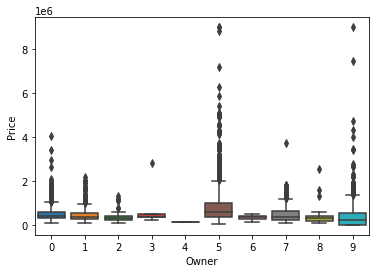

In [28]:
sns.boxplot(x=data['Owner'], y=data['Price'])

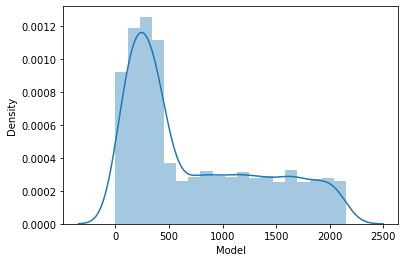

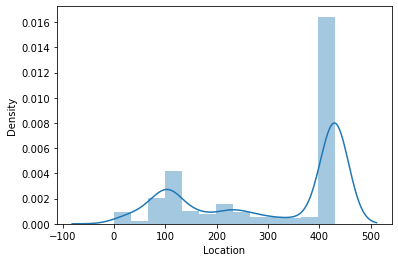

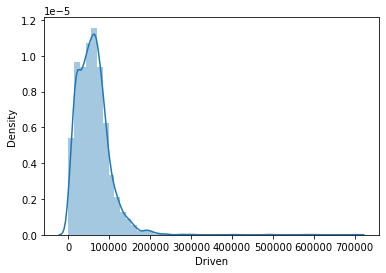

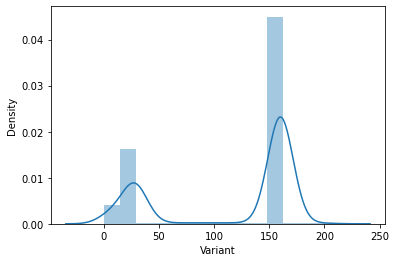

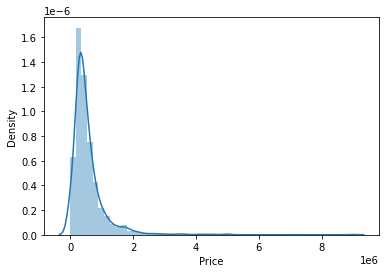

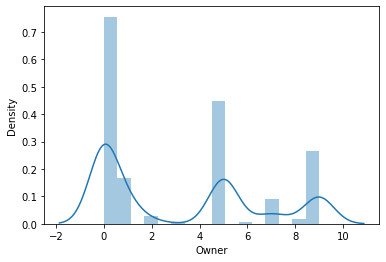

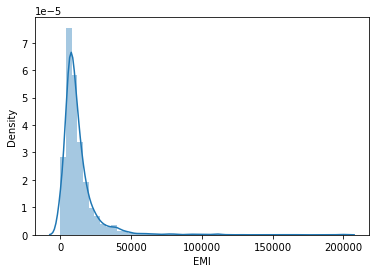

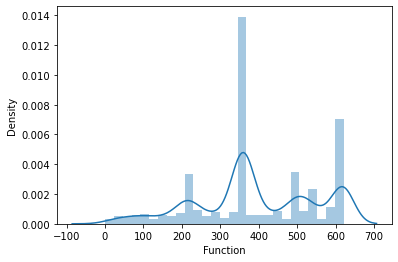

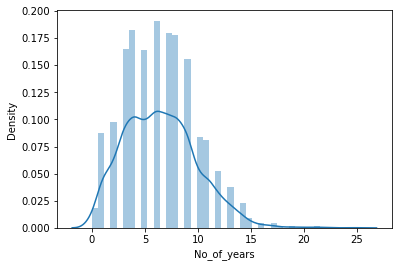

In [29]:
# Making of distplot to show the skewness in different columns
for g in data.describe().columns:
    sns.distplot(data[g])
    plt.show()

Skew is: 5.225212587913762


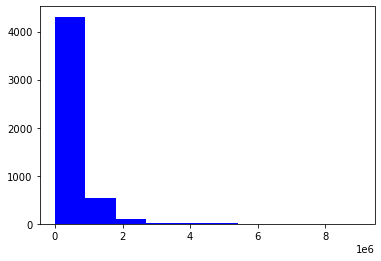

In [30]:
print ("Skew is:", data.Price.skew())
plt.hist(data.Price, color='blue')
plt.show()

<AxesSubplot:xlabel='Owner'>

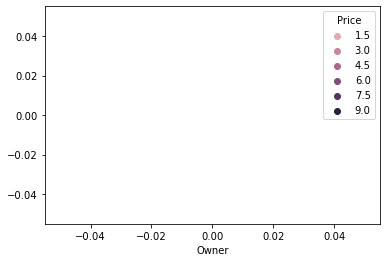

In [34]:
sns.scatterplot(x='Owner', hue='Price', data=data)

In [35]:
cols=['Model','Location','Variant','No_of_years','Owner','EMI','Function','Driven','Price']
data=data[cols]

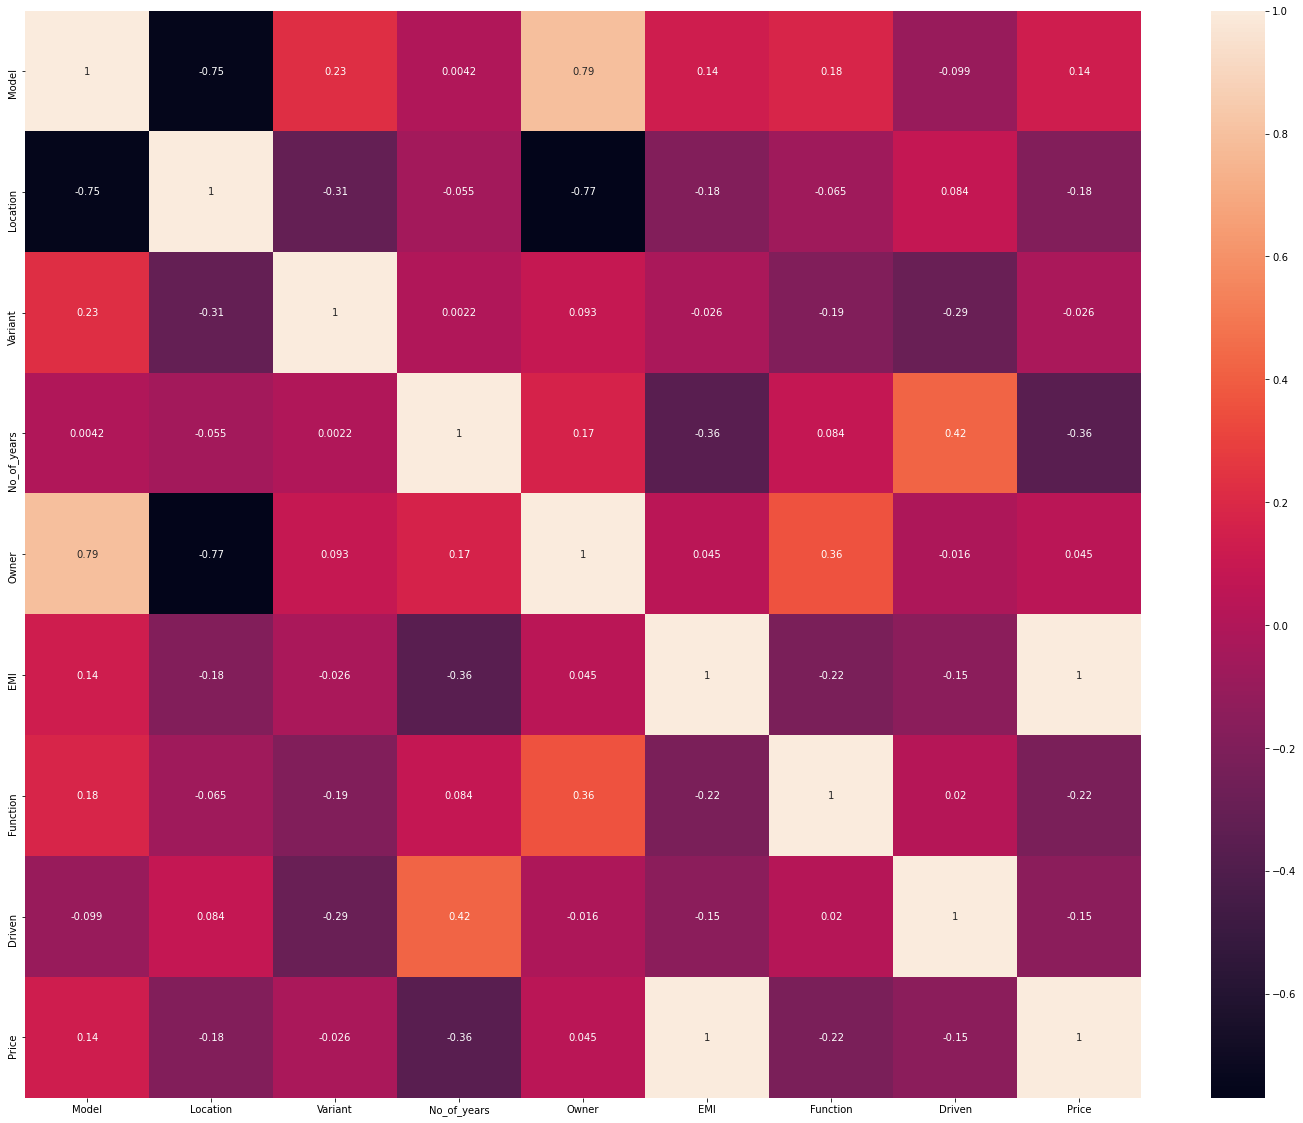

In [36]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [37]:
data.skew()

Model          0.736618
Location      -0.590011
Variant       -0.811473
No_of_years    0.541598
Owner          0.503243
EMI            5.225213
Function      -0.217808
Driven         3.035341
Price          5.225213
dtype: float64

# There is a skewness in the EMI,Driven and the price

In [38]:
#Removing of skewness using Powertransform function.

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
for i in data.skew().index[1:]:
    if data.skew().loc[i]>0.55:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))
    if data.skew().loc[i]<-0.55:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))
    else:
        data[i]=data[i]

In [39]:
data.skew()

Model          0.736618
Location      -0.543758
Variant       -0.794253
No_of_years    0.541598
Owner          0.503243
EMI            0.222526
Function      -0.217808
Driven         0.074542
Price          0.120289
dtype: float64

# Splitting the data into "X" as a feature and "Y" as the vector or the target column

In [40]:
# Splitting the data into x and y for train test split.

X=data.drop(['Price'],axis=1)
Y=data['Price']

# We will train and test the data using train_test_split

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4001, 8)
(4001,)
(1001, 8)
(1001,)


# Model Building

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
models=[]
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())


CART 0.9995550695162614 0.0007238248836230695
KNN 0.673244662565766 0.0629102610869037
RF 0.9998699778323721 0.00016486849026043125
XGBOOST 0.9998403650289959 9.84334890437546e-05


# let’s understand variation of score for each algorithm by box plot

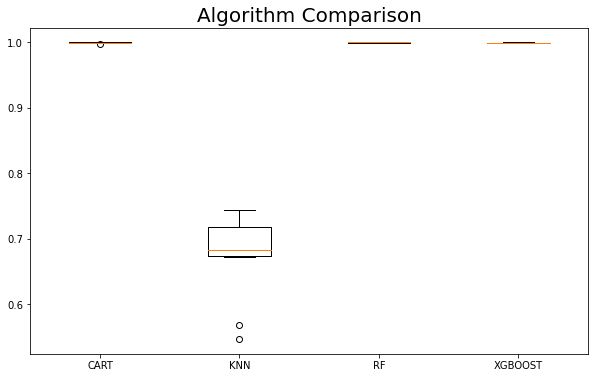

In [43]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=20)
plt.show()

# Feature Importance :- checking which all features are important for output features out of all the given features

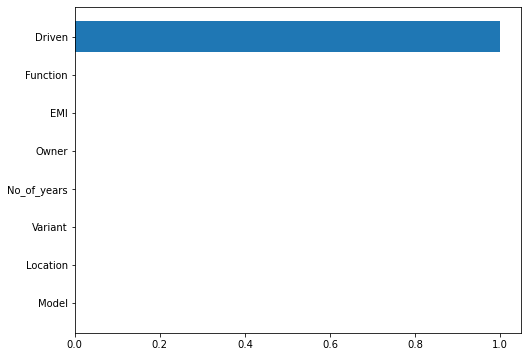

In [44]:
plt.figure(figsize=(8,6))
model=XGBRegressor()
model.fit(X,Y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

# Hyper-Parameter Tunning

In [45]:
param_grid={"n_estimators":[100,120,130,140,150],
            "max_depth":range(1,12)
           }
from sklearn.model_selection import RandomizedSearchCV
xgb=XGBRegressor()
random_cv=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,n_iter=100,cv=10)
random_cv.fit(X_train,Y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                      

# let’s check the best parameter that would be used for prediction.

In [46]:
random_cv.best_params_

{'n_estimators': 150, 'max_depth': 5}

# Check train test accuracy of dataset

In [47]:
from sklearn.metrics import r2_score 
xgb=XGBRegressor(n_estimators= 150, max_depth=5)
xgb.fit(X_train,Y_train)
Y_train_predicted=xgb.predict(X_train)
Y_test_predicted=xgb.predict(X_test)
print("Train set accuracy: ",r2_score(Y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(Y_test,Y_test_predicted))

Train set accuracy:  0.9999952774691026
Test set accuracy :  0.9998904089828219


# Understanding predicted values

In [48]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":Y_test_predicted})
Result.head(10)

,Actual,Predicted
2264,-0.507996,-0.508385
1350,0.079593,0.078009
396,1.001516,0.997516
81,1.586072,1.574159
2235,-0.610384,-0.609531
504,-0.130739,-0.132625
2201,0.038769,0.038988
679,0.029679,0.027785
432,-0.098070,-0.099735
292,-0.618225,-0.613698


# Saving the Model

In [49]:
import joblib
joblib.dump(xgb,"car_price_prediction.pkl")

['car_price_prediction.pkl']